In this notebook, we load and analyze the data appearing in the paper "Benchmarking logical three-qubit quantum Fourier transform encoded in the Steane code on a trapped-ion quantum computer."

In [16]:
import numpy as np
import pickle
import os
import json
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from analysis_functions import analyze_T_results, plot_T_data

In [5]:
# function for loading data from filename

def load_data(filename):

    current_dir = os.getcwd()
    parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
    dir_path = os.path.join(parent_dir, 'data')
    file_path = os.path.join(dir_path, filename)

    # Open the JSON file and load its content
    with open(file_path, 'r') as file:
        job_data = json.load(file)
        
    return job_data

### Load, analyze, and plot logical T gate benchmarking data

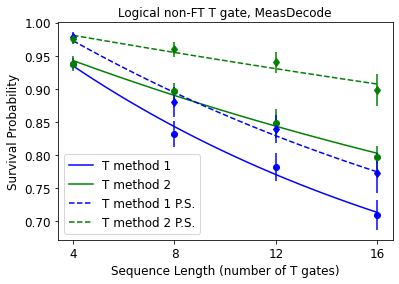

T method 1
Prob of logical Z error: 0.0287 +/- 0.0021
Average Fidelity:        0.9809 +/- 0.0014

T method 2
Prob of logical Z error: 0.0156 +/- 0.0011
Average Fidelity:        0.9896 +/- 0.0007

T method 1
Prob of logical Z error: 0.0221 +/- 0.002
Average Fidelity:        0.9853 +/- 0.0013

T method 2
Prob of logical Z error: 0.0069 +/- 0.0013
Average Fidelity:        0.9954 +/- 0.0009



In [15]:
job_data1 = load_data('T_method1_data.json')
job_data2 = load_data('T_method2_data.json')

data1 = analyze_T_results(job_data1)
data2 = analyze_T_results(job_data2)

data1_ps = analyze_T_results(job_data1, postselect=True)
data2_ps = analyze_T_results(job_data2, postselect=True)

plot_T_data([data1, data2, data1_ps, data2_ps],
          method=[1,2,1,2],
          save=False,
          ylim=None,
          colors=['blue', 'green', 'blue', 'green'],
             labels=['T method 1', 'T method 2', 'T method 1 P.S.', 'T method 2 P.S.'],
             linestyles=['-','-','--','--'],
             formats=['o','o','d','d'],
             filename='T_bench_plot_new.pdf')